In [1]:
import (
    "os"
    "log"
    "fmt"
    "bytes"
    
    "gonum.org/v1/plot"
    "gonum.org/v1/plot/plotter"
    "gonum.org/v1/plot/vg"
    "github.com/go-gota/gota/dataframe"
)

In [2]:
driverDataFile, err := os.Open("fleet_data.csv")
if err != nil {
    log.Fatal(err)
}
driverDF := dataframe.ReadCSV(driverDataFile)
driverDataFile.Close()

In [3]:
driverSummary := driverDF.Describe()

_, _ = fmt.Println(driverSummary)

[8x4] DataFrame

    column   Driver_ID         Distance_Feature Speeding_Feature
 0: mean     3423312447.500000 76.041522        10.721000
 1: median   3423312447.500000 53.330000        6.000000
 2: stddev   1154.844867       53.469563        13.708543
 3: min      3423310448.000000 15.520000        0.000000
 4: 25%      3423311447.000000 45.240000        4.000000
 5: 50%      3423312447.000000 53.330000        6.000000
 6: 75%      3423313447.000000 65.610000        9.000000
 7: max      3423314447.000000 244.790000       100.000000
    <string> <float>           <float>          <float>



In [4]:
func displayPlot(p *plot.Plot) {
    var buf bytes.Buffer
    c, err := p.WriterTo(6*vg.Inch, 6*vg.Inch, "png")
    if err != nil {
        panic(err)
    }
    
    if _, err := c.WriteTo(&buf); err != nil {
        panic(err)
    }
    
    Display(display.PNG(buf.Bytes()))
}

In [5]:
func displayHistogram(colName string) {
    plotVals := make(plotter.Values, driverDF.Nrow())
    for i, floatVal := range driverDF.Col(colName).Float() {
        plotVals[i] = floatVal
    }

    p := plot.New()
    p.Title.Text = fmt.Sprintf("Histogram of a %s", colName)
    
    h, err := plotter.NewHist(plotVals, 16)
    if err != nil {
        log.Fatal(err)
    }
    
    h.Normalize(1)
    
    p.Add(h)
    
    displayPlot(p)
}

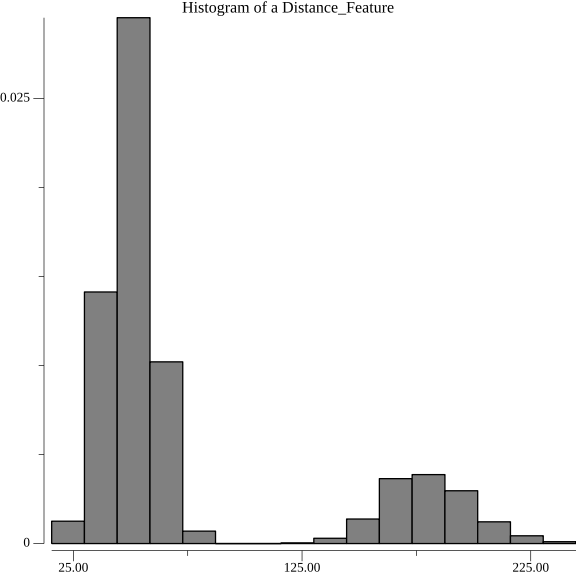

In [6]:
displayHistogram("Distance_Feature")

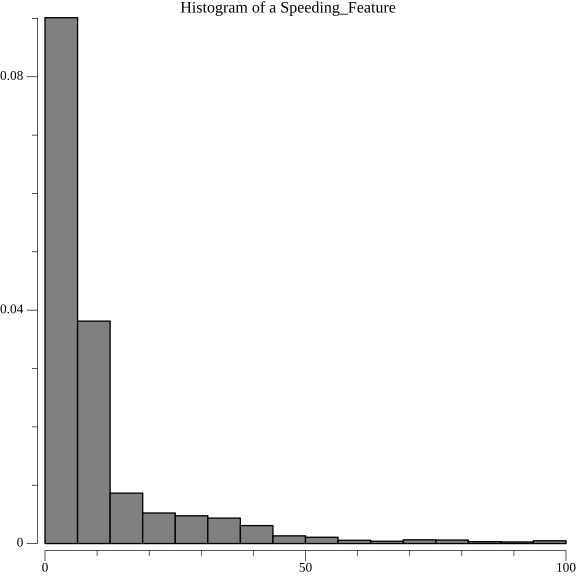

In [7]:
displayHistogram("Speeding_Feature")